<a href="https://colab.research.google.com/github/seanmcmahon101/Fancy-Crap-Folder/blob/main/ANOVA_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import scipy.stats as stats
import numpy as np

# Function to perform ANOVA process
def anova_process(list1, list2):
    # Check for independence
    if stats.bartlett(list1, list2).pvalue > 0.05:
        # Check for equal variances
        if stats.levene(list1, list2).pvalue > 0.05:
            # Check for normality
            if stats.shapiro(list1).pvalue > 0.05 and stats.shapiro(list2).pvalue > 0.05:
                # Run ANOVA or T-test
                f_val, p_val = stats.f_oneway(list1, list2)
                if p_val <= 0.05:
                    return "There is a difference (ANOVA)"
                else:
                    return "There is no difference (ANOVA)"
            else:
                # Non-parametric test (Mann-Whitney)
                u_val, p_val = stats.mannwhitneyu(list1, list2)
                if p_val <= 0.05:
                    return "There is a difference (Mann-Whitney)"
                else:
                    return "There is no difference (Mann-Whitney)"
        else:
            # Equal variances not assumed, use Welch's t-test
            t_val, p_val = stats.ttest_ind(list1, list2, equal_var=False)
            if p_val <= 0.05:
                return "There is a difference (Welch's t-test)"
            else:
                return "There is no difference (Welch's t-test)"
    else:
        return "Data not independent, cannot proceed."

# Example usage:
list1 = [1, 2, 3, 4, 5]  # Replace with your data
list2 = [1, 2, 2, 4, 5]  # Replace with your data

result = anova_process(list1, list2)
print(result)


There is no difference (ANOVA)


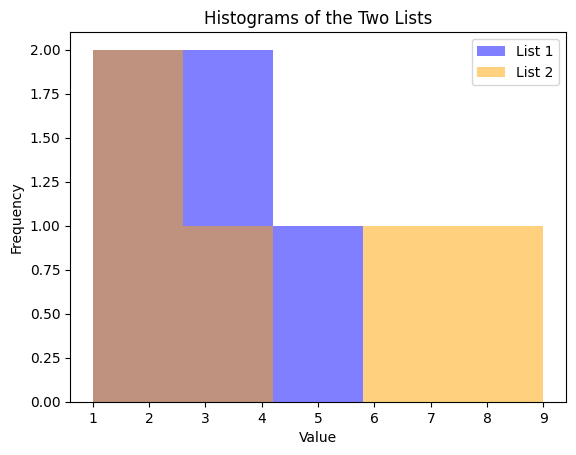

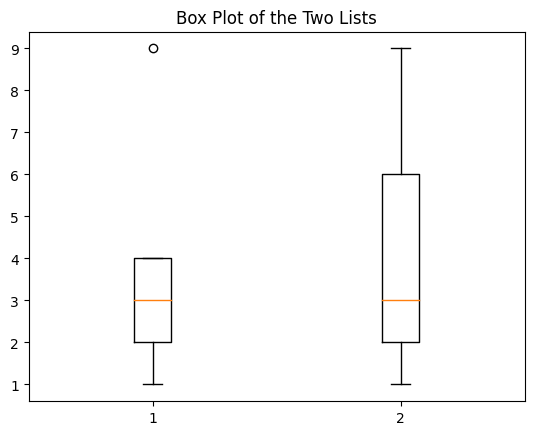

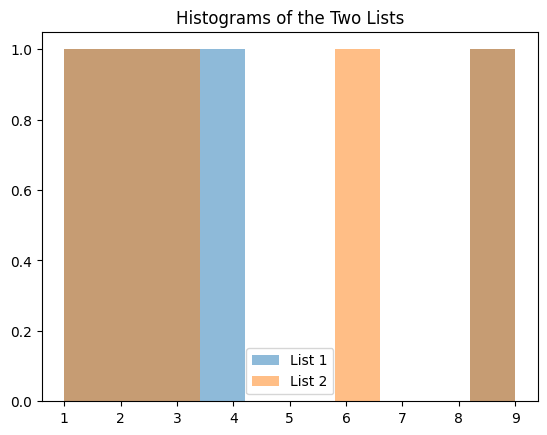

There is no difference (ANOVA)


In [7]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

def anova_process(list1, list2):
    # Plot box plots for initial data visualization
    plt.boxplot([list1, list2])
    plt.title('Box Plot of the Two Lists')
    plt.savefig('boxplot.png')
    plt.show()

    # Check for independence
    if stats.bartlett(list1, list2).pvalue > 0.05:
        # Plot histograms for checking normality
        plt.hist(list1, alpha=0.5, label='List 1')
        plt.hist(list2, alpha=0.5, label='List 2')
        plt.title('Histograms of the Two Lists')
        plt.legend()
        plt.savefig('histograms.png')
        plt.show()

        # Check for equal variances
        if stats.levene(list1, list2).pvalue > 0.05:
            # Check for normality
            if stats.shapiro(list1).pvalue > 0.05 and stats.shapiro(list2).pvalue > 0.05:
                # Run ANOVA
                f_val, p_val = stats.f_oneway(list1, list2)
                if p_val <= 0.05:
                    return "There is a difference (ANOVA)"
                else:
                    return "There is no difference (ANOVA)"
            else:
                # Non-parametric test (Mann-Whitney)
                u_val, p_val = stats.mannwhitneyu(list1, list2)
                if p_val <= 0.05:
                    return "There is a difference (Mann-Whitney)"
                else:
                    return "There is no difference (Mann-Whitney)"
        else:
            # Welch's t-test
            t_val, p_val = stats.ttest_ind(list1, list2, equal_var=False)
            if p_val <= 0.05:
                return "There is a difference (Welch's t-test)"
            else:
                return "There is no difference (Welch's t-test)"
    else:
        return "Data not independent, cannot proceed."

def plot_histograms(list1, list2):
    # Calculate the number of bins based on the Sturges' rule
    bins = np.histogram_bin_edges(list1 + list2, bins='sturges')

    plt.hist(list1, bins=bins, alpha=0.5, label='List 1', color='blue')
    plt.hist(list2, bins=bins, alpha=0.5, label='List 2', color='orange')

    plt.title('Histograms of the Two Lists')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.savefig('histograms.png')
    plt.show()

# Call the function where needed in anova_process
plot_histograms(list1, list2)


# Example usage:
list1 = [1, 2, 3, 4, 9]  # Replace with your data
list2 = [2, 6, 3, 1, 9]  # Replace with your data

result = anova_process(list1, list2)
print(result)


In [11]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

def anova_process(list1, list2):
    # Test for independence using Bartlett's test
    bartlett_stat, bartlett_p = stats.bartlett(list1, list2)
    print(f"Bartlett's test p-value: {bartlett_p:.4f}")
    # Plot histograms for checking normality
        plt.hist(list1, alpha=0.5, label='List 1')
        plt.hist(list2, alpha=0.5, label='List 2')
        plt.title('Histograms of the Two Lists')
        plt.legend()
        plt.savefig('histograms.png')
        plt.show()

    if bartlett_p > 0.05:
        # Test for equal variances using Levene's test
        levene_stat, levene_p = stats.levene(list1, list2)
        print(f"Levene's test p-value: {levene_p:.4f}")

        if levene_p > 0.05:
            # Test for normality using Shapiro-Wilk test
            shapiro_stat1, shapiro_p1 = stats.shapiro(list1)
            shapiro_stat2, shapiro_p2 = stats.shapiro(list2)
            print(f"Shapiro-Wilk test p-value for list 1: {shapiro_p1:.4f}")
            print(f"Shapiro-Wilk test p-value for list 2: {shapiro_p2:.4f}")

            if shapiro_p1 > 0.05 and shapiro_p2 > 0.05:
                # Run ANOVA
                f_val, anova_p = stats.f_oneway(list1, list2)
                print(f"ANOVA p-value: {anova_p:.4f}")

                if anova_p <= 0.05:
                    return "There is a difference (ANOVA)"
                else:
                    return "There is no difference (ANOVA)"
            else:
                # Non-parametric test (Mann-Whitney U test)
                u_stat, mannwhitney_p = stats.mannwhitneyu(list1, list2)
                print(f"Mann-Whitney U test p-value: {mannwhitney_p:.4f}")

                if mannwhitney_p <= 0.05:
                    return "There is a difference (Mann-Whitney U test)"
                else:
                    return "There is no difference (Mann-Whitney U test)"
        else:
            # Welch's t-test
            t_stat, welch_p = stats.ttest_ind(list1, list2, equal_var=False)
            print(f"Welch's t-test p-value: {welch_p:.4f}")

            if welch_p <= 0.05:
                return "There is a difference (Welch's t-test)"
            else:
                return "There is no difference (Welch's t-test)"
    else:
        return "Data not independent, cannot proceed."

# Plotting function remains unchanged
def plot_histograms(list1, list2):
    # Calculate the number of bins based on the Sturges' rule
    bins = np.histogram_bin_edges(list1 + list2, bins='sturges')

    plt.hist(list1, bins=bins, alpha=0.5, label='List 1', color='blue')
    plt.hist(list2, bins=bins, alpha=0.5, label='List 2', color='orange')

    plt.title('Histograms of the Two Lists')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.savefig('histograms.png')


# Example usage:
list1 = [1, 2, 3, 4, 5]  # Replace with your data
list2 = [5, 3, 2, 8, 9]  # Replace with your data

result = anova_process(list1, list2)
plot_histograms(list1, list2) # Call this where appropriate in your code
print(result)


IndentationError: ignored

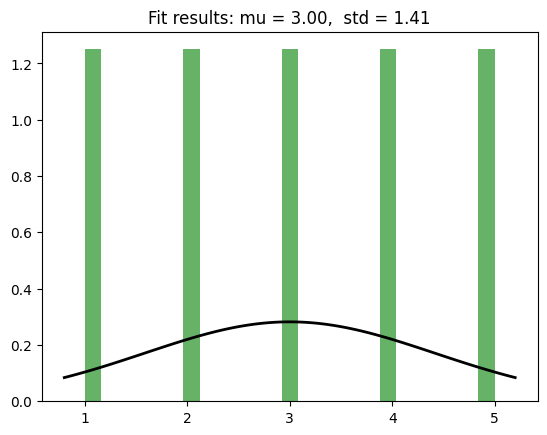

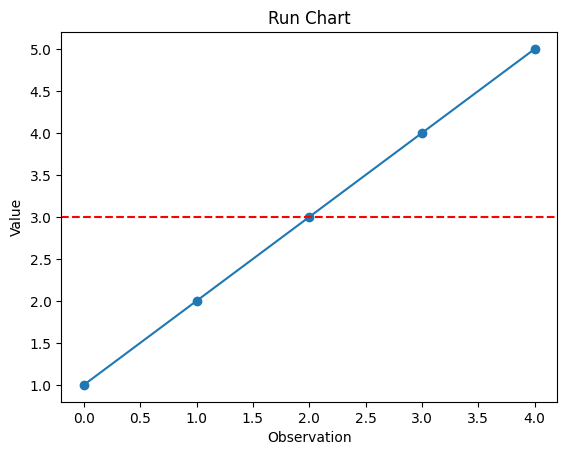

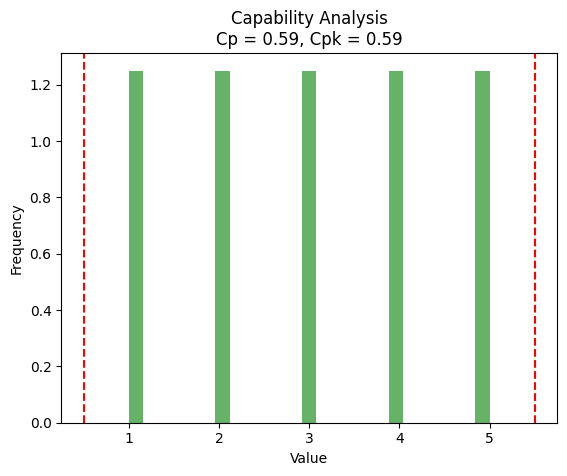

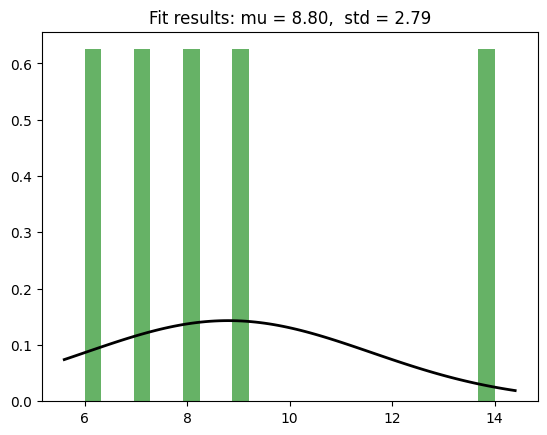

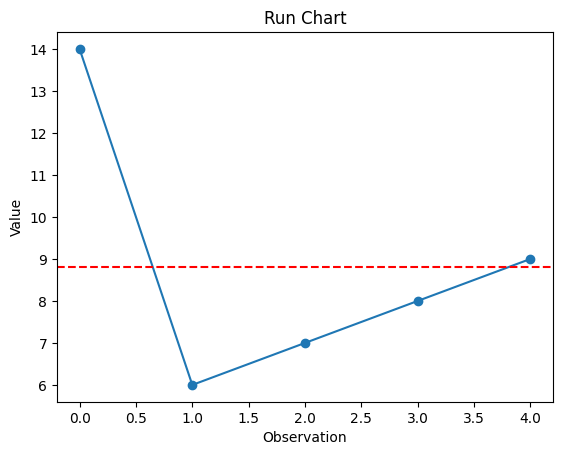

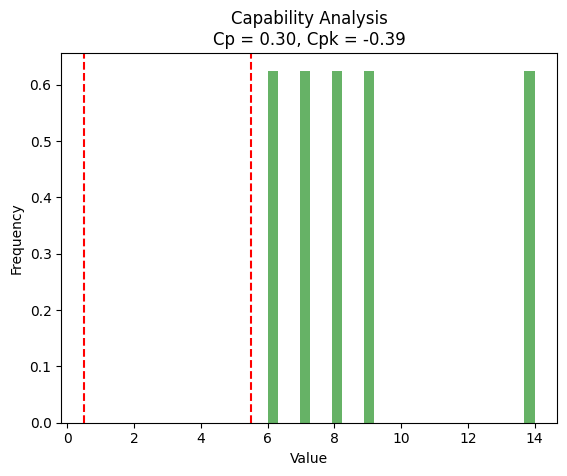

Bartlett's test p-value: 0.2173
Levene's test p-value: 0.4929
Shapiro-Wilk test p-value for list 1: 0.9672
Shapiro-Wilk test p-value for list 2: 0.2543


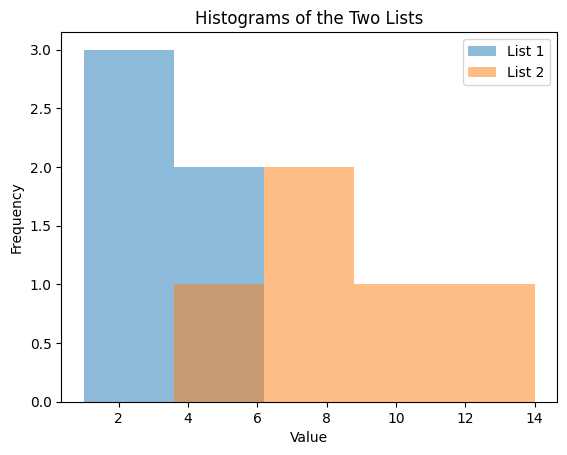

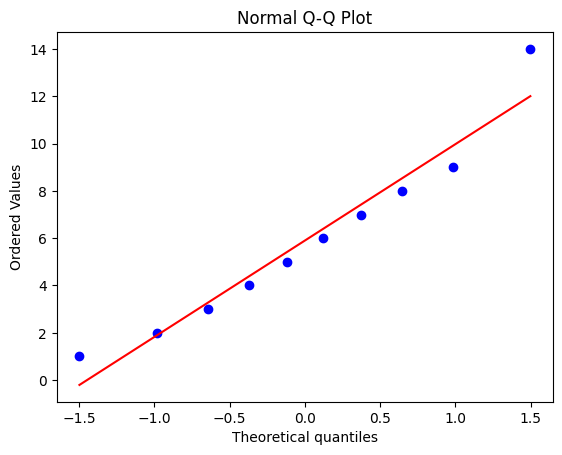

ANOVA p-value: 0.0059
There is a difference (ANOVA)


In [21]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

def anova_process(list1, list2):
    # Test for independence using Bartlett's test
    bartlett_stat, bartlett_p = stats.bartlett(list1, list2)
    print(f"Bartlett's test p-value: {bartlett_p:.4f}")

    if bartlett_p > 0.05:
        # Test for equal variances using Levene's test
        levene_stat, levene_p = stats.levene(list1, list2)
        print(f"Levene's test p-value: {levene_p:.4f}")

        # Check for normality using Shapiro-Wilk test
        shapiro_stat1, shapiro_p1 = stats.shapiro(list1)
        shapiro_stat2, shapiro_p2 = stats.shapiro(list2)
        print(f"Shapiro-Wilk test p-value for list 1: {shapiro_p1:.4f}")
        print(f"Shapiro-Wilk test p-value for list 2: {shapiro_p2:.4f}")

        # Plot histograms for checking normality
        plot_histograms(list1, list2)

        # If the data is normal, proceed with ANOVA or T-test
        if shapiro_p1 > 0.05 and shapiro_p2 > 0.05:
            # Run ANOVA
            f_val, anova_p = stats.f_oneway(list1, list2)
            print(f"ANOVA p-value: {anova_p:.4f}")

            if anova_p <= 0.05:
                return "There is a difference (ANOVA)"
            else:
                return "There is no difference (ANOVA)"
        else:
            # Non-parametric test (Mann-Whitney U test)
            u_stat, mannwhitney_p = stats.mannwhitneyu(list1, list2)
            print(f"Mann-Whitney U test p-value: {mannwhitney_p:.4f}")

            if mannwhitney_p <= 0.05:
                return "There is a difference (Mann-Whitney U test)"
            else:
                return "There is no difference (Mann-Whitney U test)"
    else:
        return "Data not independent, cannot proceed."

def plot_histogram_with_fit(data):
    # Histogram with a normal distribution fit
    mu, std = stats.norm.fit(data)
    plt.hist(data, bins=25, alpha=0.6, color='g', density=True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.savefig('histogram_with_fit.png')
    plt.show()


def qq_plot_data(list1, list2):
    plt.figure()
    stats.probplot(np.concatenate((list1, list2)), dist="norm", plot=plt)
    plt.title('Normal Q-Q Plot')
    plt.savefig('qqplot.png')
    plt.show()

def plot_run_chart(data, title='Run Chart'):
    # Run chart to assess process stability
    plt.plot(data, linestyle='-', marker='o')
    plt.axhline(np.mean(data), color='red', linestyle='dashed')
    plt.title(title)
    plt.xlabel('Observation')
    plt.ylabel('Value')
    plt.savefig('run_chart.png')
    plt.show()

def plot_capability_analysis(data, spec_limits, title='Capability Analysis'):
    # Capability analysis plot (Cp, Cpk values)
    Cp = (spec_limits[1] - spec_limits[0]) / (6 * np.std(data))
    Cpu = (spec_limits[1] - np.mean(data)) / (3 * np.std(data))
    Cpl = (np.mean(data) - spec_limits[0]) / (3 * np.std(data))
    Cpk = min(Cpu, Cpl)

    plt.hist(data, bins=25, alpha=0.6, color='g', density=True)
    plt.axvline(x=spec_limits[0], color='r', linestyle='--')
    plt.axvline(x=spec_limits[1], color='r', linestyle='--')
    plt.title(f'{title}\nCp = {Cp:.2f}, Cpk = {Cpk:.2f}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.savefig('capability_analysis.png')
    plt.show()

# Example usage:
list1 = [1, 2, 3, 4, 5]  # Replace with your data
list2 = [14, 6, 7, 8, 9]  # Replace with your data
spec_limits = [0.5, 5.5]  # Replace with your specification limits

plot_histogram_with_fit(list1)
plot_run_chart(list1)
plot_capability_analysis(list1, spec_limits)
plot_histogram_with_fit(list2)
plot_run_chart(list2)
plot_capability_analysis(list2, spec_limits)
result = anova_process(list1, list2)
print(result)


Bartlett's test p-value: 0.0000
Levene's test p-value: 0.0015
Shapiro-Wilk test p-value for list 1: 0.6653
Shapiro-Wilk test p-value for list 2: 0.1912
ANOVA p-value: 0.0000


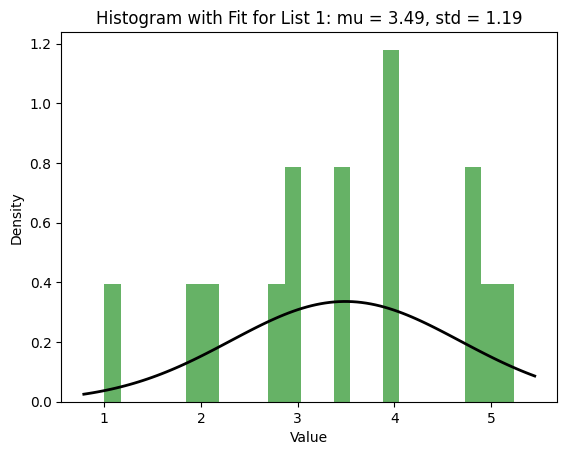

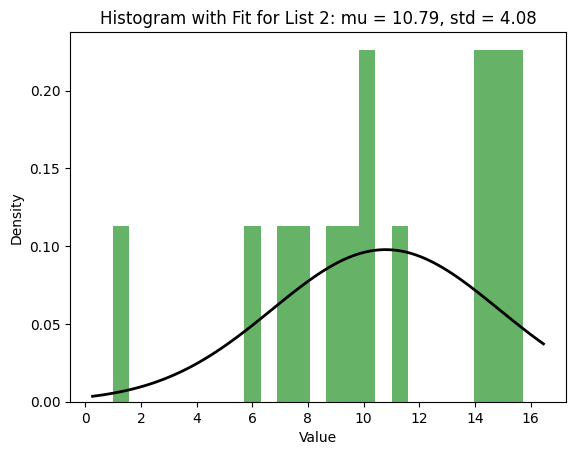

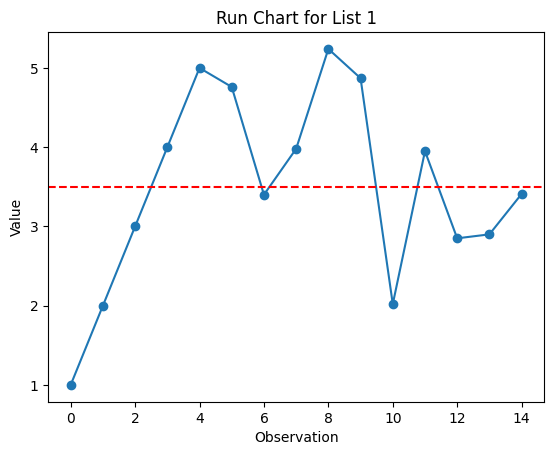

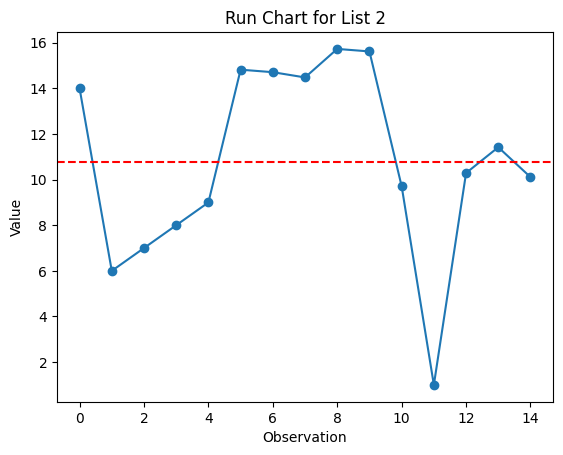

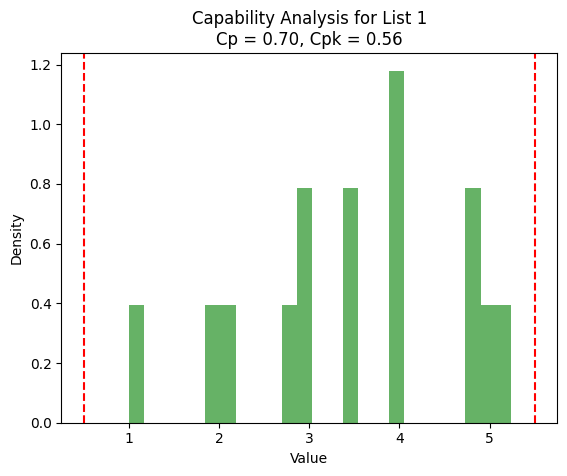

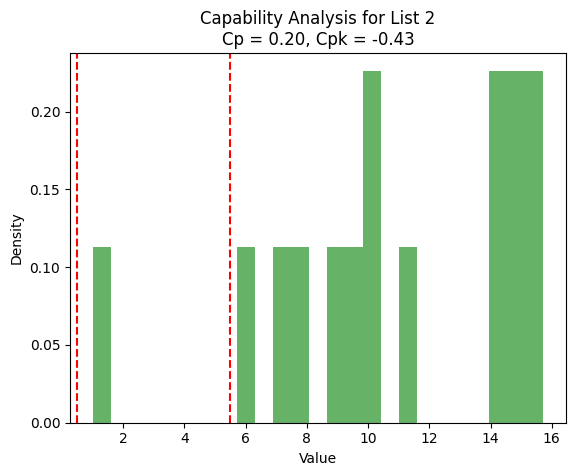

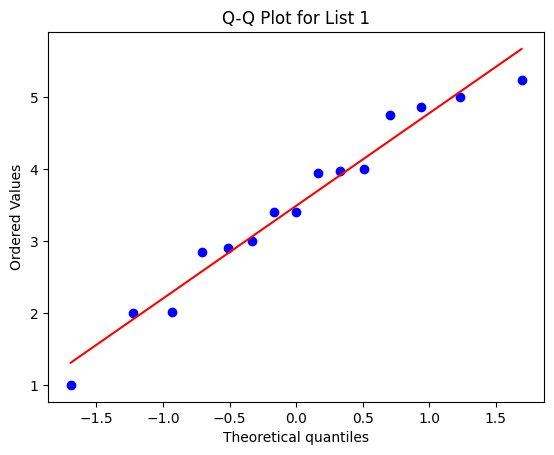

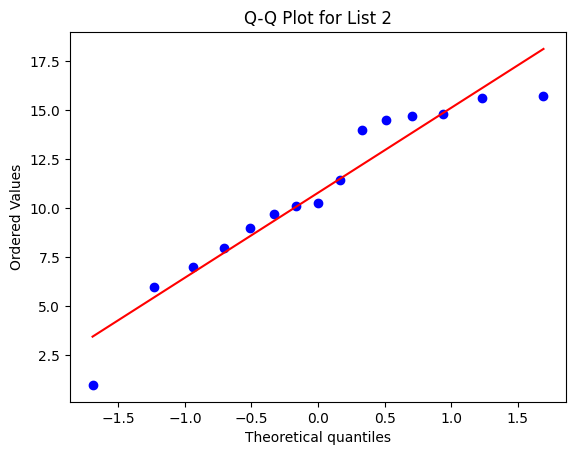

There is a difference


In [25]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

def run_bartletts_test(list1, list2):
    stat, p = stats.bartlett(list1, list2)
    return p

def run_levenes_test(list1, list2):
    stat, p = stats.levene(list1, list2)
    return p

def run_shapiro_wilk_test(data):
    stat, p = stats.shapiro(data)
    return p

def run_anova(list1, list2):
    stat, p = stats.f_oneway(list1, list2)
    return p

def run_mann_whitney_u_test(list1, list2):
    stat, p = stats.mannwhitneyu(list1, list2)
    return p

def plot_histogram_with_fit(data, title='Histogram with Fit'):
    mu, std = stats.norm.fit(data)
    plt.hist(data, bins=25, alpha=0.6, color='g', density=True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f'{title}: mu = {mu:.2f}, std = {std:.2f}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.savefig(f'{title.replace(" ", "_").lower()}.png')
    plt.show()

def plot_qq(data, title='Normal Q-Q Plot'):
    plt.figure()
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.savefig(f'{title.replace(" ", "_").lower()}.png')
    plt.show()

def plot_run_chart(data, title='Run Chart'):
    plt.plot(data, linestyle='-', marker='o')
    plt.axhline(np.mean(data), color='red', linestyle='dashed')
    plt.title(title)
    plt.xlabel('Observation')
    plt.ylabel('Value')
    plt.savefig(f'{title.replace(" ", "_").lower()}.png')
    plt.show()

def plot_capability_analysis(data, spec_limits, title='Capability Analysis'):
    Cp = (spec_limits[1] - spec_limits[0]) / (6 * np.std(data))
    Cpu = (spec_limits[1] - np.mean(data)) / (3 * np.std(data))
    Cpl = (np.mean(data) - spec_limits[0]) / (3 * np.std(data))
    Cpk = min(Cpu, Cpl)
    plt.hist(data, bins=25, alpha=0.6, color='g', density=True)
    plt.axvline(x=spec_limits[0], color='r', linestyle='--')
    plt.axvline(x=spec_limits[1], color='r', linestyle='--')
    plt.title(f'{title}\nCp = {Cp:.2f}, Cpk = {Cpk:.2f}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.savefig(f'{title.replace(" ", "_").lower()}.png')
    plt.show()

# Example usage:
list1 = [1.0, 2.0, 3.0, 4.0, 5.0, 4.76, 3.40, 3.98, 5.24, 4.87, 2.02, 3.95, 2.85, 2.90, 3.41]
list2 = [14.0, 6.0, 7.0, 8.0, 9.0, 14.82, 14.71, 14.48, 15.73, 15.62, 9.71, 1, 10.29, 11.42, 10.11]
spec_limits = [0.5, 5.5]  # Replace with your specification limits

# Run statistical tests
bartlett_p = run_bartletts_test(list1, list2)
levene_p = run_levenes_test(list1, list2)
shapiro_p1 = run_shapiro_wilk_test(list1)
shapiro_p2 = run_shapiro_wilk_test(list2)
anova_p = run_anova(list1, list2) if shapiro_p1 > 0.05 and shapiro_p2 > 0.05 else None
mannwhitney_p = run_mann_whitney_u_test(list1, list2) if anova_p is None else None

# Output the results
print(f"Bartlett's test p-value: {bartlett_p:.4f}")
print(f"Levene's test p-value: {levene_p:.4f}")
print(f"Shapiro-Wilk test p-value for list 1: {shapiro_p1:.4f}")
print(f"Shapiro-Wilk test p-value for list 2: {shapiro_p2:.4f}")
if anova_p is not None:
    print(f"ANOVA p-value: {anova_p:.4f}")
elif mannwhitney_p is not None:
    print(f"Mann-Whitney U test p-value: {mannwhitney_p:.4f}")

# Plotting for List 1
plot_histogram_with_fit(list1, 'Histogram with Fit for List 1')
plot_histogram_with_fit(list2, 'Histogram with Fit for List 2')

plot_run_chart(list1, 'Run Chart for List 1')
plot_run_chart(list2, 'Run Chart for List 2')

plot_capability_analysis(list1, spec_limits, 'Capability Analysis for List 1')
plot_capability_analysis(list2, spec_limits, 'Capability Analysis for List 2')

plot_qq(list1, 'Q-Q Plot for List 1')
plot_qq(list2, 'Q-Q Plot for List 2')


# Determine the result based on p-values
result = "There is a difference" if (anova_p is not None and anova_p <= 0.05) else \
         "There is a difference (Mann-Whitney U test)" if (mannwhitney_p is not None and mannwhitney_p <= 0.05) else \
         "There is no difference"
print(result)
